## Import Library

In [2]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset

In [4]:
df = pd.read_csv('gender_classification.csv')
df.head()


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [5]:
features = df.iloc[[0,1,2,3,4,5,6]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [9]:
features = df[['long_hair','forehead_width_cm','forehead_height_cm','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long']]

In [10]:
X = df.values[:, 0:6]
Y = df.values[:, 7]

In [11]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

In [25]:
clf_ent = DecisionTreeClassifier(criterion="gini", random_state= 100, max_depth = 3, min_samples_leaf = 7)
clf_ent.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=7, random_state=100)

In [26]:
y_pred = clf_ent.predict(X_test)
y_pred

array(['Male', 'Female', 'Female', ..., 'Female', 'Male', 'Male'],
      dtype=object)

In [27]:
accuracy_score(y_test, y_pred)*100

96.00399600399601

jika dilihat dari hasil akurasi nilai sudah sangat tinggi dengan menggunakan random state 100, max_depth = 3, dan minimal sample lead 7, dihasil kan untuk akurasi nilai sebesar 96.00399600399601.

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Female       0.96      0.96      0.96       504
        Male       0.96      0.96      0.96       497

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



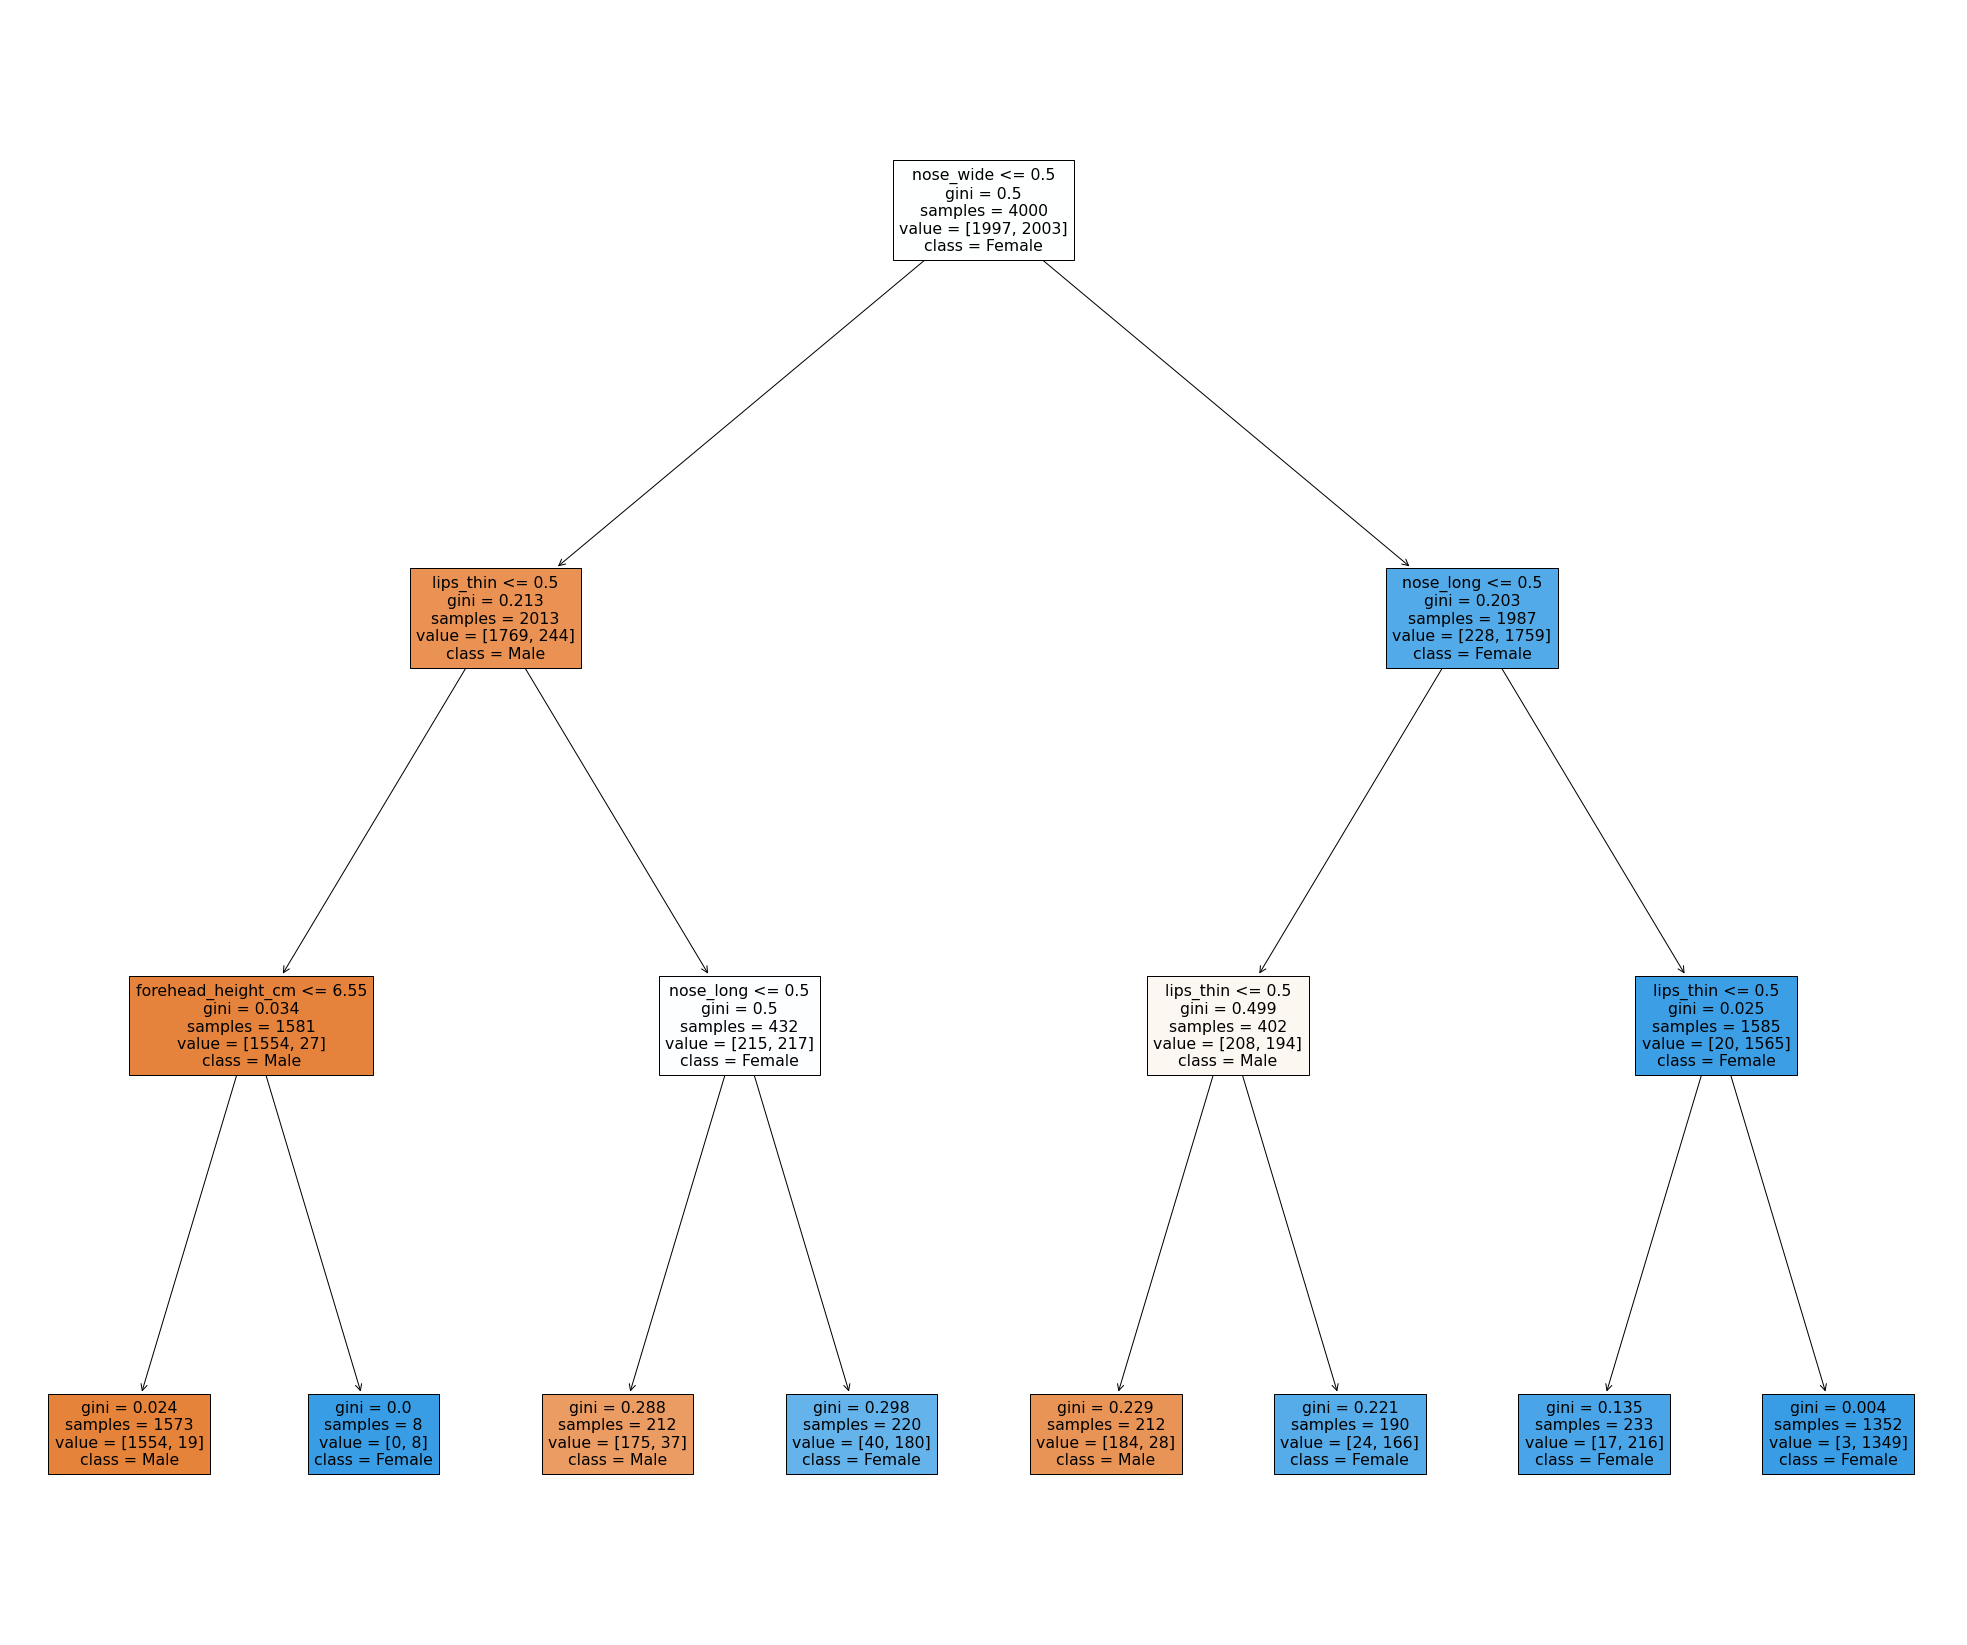

In [29]:
fiq = plt.figure(figsize=(35,30))
tree.plot_tree(clf_ent, feature_names=features.columns, class_names=df.gender, filled= True)
plt.show()

In [31]:
print(clf_ent.score(X_train, y_train)*100)
print(clf_ent.score(X_test, y_test)*100)

95.8
96.00399600399601


In [33]:
plt.savefig('tree_gender.jpg')

<Figure size 432x288 with 0 Axes>